In [1]:
import pandas as pd

In [6]:
df=pd.read_csv('/content/dataset_sdn (1).csv', memory_map=True, header='infer')

In [ ]:
for column in df.columns:
    print(f"Column: {column}")
    print(df[column].value_counts())
    print("------------------------")

In [66]:
df['Protocol'].unique()

array(['UDP', 'TCP', 'ICMP'], dtype=object)

In [67]:
df['src'] = df['src'].str.split('.').str[-1]
df['dst'] = df['dst'].str.split('.').str[-1]

protocol_mapping = {'TCP': -1, 'UDP': 0, 'ICMP': 1}
df['Protocol'] = df['Protocol'].replace(protocol_mapping)

In [68]:
df.head()

,dt,switch,src,dst,pktcount,bytecount,dur,dur_nsec,tot_dur,flows,...,pktrate,Pairflow,Protocol,port_no,tx_bytes,rx_bytes,tx_kbps,rx_kbps,tot_kbps,label
0,-0.542890,1,1,8,0.174242,0.328245,-0.781249,0.919175,-0.779412,3,...,0.96733,0,0,3,0.333532,-0.701328,-0.412179,0.0,0.0,0
1,-0.527862,1,1,8,0.486123,0.915781,-0.146367,0.984157,-0.144270,2,...,0.96733,0,0,4,-0.613732,-0.701331,-0.412179,0.0,0.0,0
2,-0.542890,1,2,8,0.347427,0.654498,-0.428537,1.020258,-0.426555,3,...,0.96733,0,0,1,-0.613733,-0.701348,-0.412179,0.0,0.0,0
3,-0.542890,1,2,8,0.347427,0.654498,-0.428537,1.020258,-0.426555,3,...,0.96733,0,0,2,-0.613733,-0.701346,-0.412179,0.0,0.0,0
4,-0.542890,1,2,8,0.347427,0.654498,-0.428537,1.020258,-0.426555,3,...,0.96733,0,0,3,-0.613735,-0.701330,-0.412179,0.0,0.0,0


In [76]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from scipy.stats import skew, kurtosis

columns_to_normalize = ['dt', 'pktcount', 'bytecount', 'dur', 'dur_nsec', 'tot_dur',
                         'packetins', 'pktperflow', 'byteperflow', 'pktrate',
                         'tx_bytes', 'rx_bytes', 'tx_kbps', 'rx_kbps', 'tot_kbps']

for column in df.columns:
    if column in columns_to_normalize:
        skewness = skew(df[column])
        kurt = kurtosis(df[column])

        if abs(skewness) > 1 or abs(kurt) > 1:
            # Apply Standardization for skewed or kurtotic data
            scaler = StandardScaler()
            df[column] = scaler.fit_transform(df[[column]])
            print(f"Applied Standardization to column: {column}")
        else:
            # Apply Min-Max Scaling for approximately normally distributed data
            scaler = MinMaxScaler()
            df[column] = scaler.fit_transform(df[[column]])
            print(f"Applied Min-Max Scaling to column: {column}")

# Display the normalized DataFrame
print(df)

Applied Standardization to column: dt
Applied Min-Max Scaling to column: pktcount
Applied Min-Max Scaling to column: bytecount
Applied Standardization to column: dur
Applied Standardization to column: dur_nsec
Applied Standardization to column: tot_dur
Applied Standardization to column: packetins
Applied Standardization to column: pktperflow
Applied Standardization to column: byteperflow
Applied Standardization to column: pktrate
Applied Standardization to column: tx_bytes
Applied Standardization to column: rx_bytes
Applied Standardization to column: tx_kbps
Applied Min-Max Scaling to column: rx_kbps
Applied Min-Max Scaling to column: tot_kbps
              dt  switch src dst  pktcount  bytecount       dur  dur_nsec  \
0      -0.542890       1   1   8  0.174242   0.328245 -0.781249  0.919175   
1      -0.527862       1   1   8  0.486123   0.915781 -0.146367  0.984157   
2      -0.542890       1   2   8  0.347427   0.654498 -0.428537  1.020258   
3      -0.542890       1   2   8  0.3474

# ONE-HOT ENCODING

In [25]:
df_one_hot = pd.get_dummies(df, columns=['switch', 'dst', 'src', 'flows', 'Protocol', 'port_no'], prefix=['switch', 'dst', 'src', 'flows', 'Protocol', 'port_no'])

# IMPUTATION WITH ONE-HOT ENCODING

In [36]:
import pandas as pd

# Get count of null values in each column
null_count = df_one_hot.isnull().sum()

# Display the count of null values
for index,value in enumerate(null_count):
  if (value!=0):
    print(list(df_one_hot.columns)[index])


rx_kbps
tot_kbps


In [38]:
import pandas as pd
from sklearn.impute import KNNImputer
from sklearn.impute import SimpleImputer

# Assuming df_one_hot is your DataFrame
# df_one_hot = pd.read_csv('your_file.csv')

# Selecting columns with missing values
columns_with_missing = ['rx_kbps', 'tot_kbps']
df_missing = df_one_hot[columns_with_missing]

# Hot-Deck (HD) Imputation
# Filling missing values with the next available observation
df_hd = df_missing.fillna(method='bfill')

# Expectation Maximization (EM) Imputation
# Using SimpleImputer with EM method
em_imputer = SimpleImputer(strategy='constant', fill_value=None)  # EM is the default strategy
df_em = pd.DataFrame(em_imputer.fit_transform(df_missing), columns=df_missing.columns)

# K-Nearest Neighbor (KNN) Imputation
knn_imputer = KNNImputer(n_neighbors=5)  # Using 5 nearest neighbors
df_knn = pd.DataFrame(knn_imputer.fit_transform(df_missing), columns=df_missing.columns)

# Comparing the imputed values
print("Hot-Deck Imputation:")
print(df_hd.head())
print("\nExpectation Maximization (EM) Imputation:")
print(df_em.head())
print("\nK-Nearest Neighbor (KNN) Imputation:")
print(df_knn.head())


Hot-Deck Imputation:
   rx_kbps  tot_kbps
0      0.0       0.0
1      0.0       0.0
2      0.0       0.0
3      0.0       0.0
4      0.0       0.0

Expectation Maximization (EM) Imputation:
   rx_kbps  tot_kbps
0      0.0       0.0
1      0.0       0.0
2      0.0       0.0
3      0.0       0.0
4      0.0       0.0

K-Nearest Neighbor (KNN) Imputation:
   rx_kbps  tot_kbps
0      0.0       0.0
1      0.0       0.0
2      0.0       0.0
3      0.0       0.0
4      0.0       0.0


In [39]:
# Replace missing values in df_one_hot with imputed values
df_one_hot_hd = df_one_hot.copy()
df_one_hot_em = df_one_hot.copy()
df_one_hot_knn = df_one_hot.copy()

df_one_hot_hd[columns_with_missing] = df_hd
df_one_hot_em[columns_with_missing] = df_em
df_one_hot_knn[columns_with_missing] = df_knn


In [41]:
from sklearn.model_selection import train_test_split

# Define features (X) and target (y)
X_hd = df_one_hot_hd.drop('label', axis=1)
y_hd = df_one_hot_hd['label']

X_em = df_one_hot_em.drop('label', axis=1)
y_em = df_one_hot_em['label']

X_knn = df_one_hot_knn.drop('label', axis=1)
y_knn = df_one_hot_knn['label']

# Split the data
X_train_hd, X_test_hd, y_train_hd, y_test_hd = train_test_split(X_hd, y_hd, test_size=0.2, random_state=42)
X_train_em, X_test_em, y_train_em, y_test_em = train_test_split(X_em, y_em, test_size=0.2, random_state=42)
X_train_knn, X_test_knn, y_train_knn, y_test_knn = train_test_split(X_knn, y_knn, test_size=0.2, random_state=42)


In [42]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Initialize RandomForestClassifier
clf = RandomForestClassifier(random_state=42)

# Train the model with Hot-Deck imputed data
clf.fit(X_train_hd, y_train_hd)
y_pred_hd = clf.predict(X_test_hd)
accuracy_hd = accuracy_score(y_test_hd, y_pred_hd)

# Train the model with Expectation Maximization (EM) imputed data
clf.fit(X_train_em, y_train_em)
y_pred_em = clf.predict(X_test_em)
accuracy_em = accuracy_score(y_test_em, y_pred_em)

# Train the model with K-Nearest Neighbor (KNN) imputed data
clf.fit(X_train_knn, y_train_knn)
y_pred_knn = clf.predict(X_test_knn)
accuracy_knn = accuracy_score(y_test_knn, y_pred_knn)

print(f"Accuracy with Hot-Deck imputation: {accuracy_hd:.4f}")
print(f"Accuracy with Expectation Maximization (EM) imputation: {accuracy_em:.4f}")
print(f"Accuracy with K-Nearest Neighbor (KNN) imputation: {accuracy_knn:.4f}")


Accuracy with Hot-Deck imputation: 0.9997
Accuracy with Expectation Maximization (EM) imputation: 0.9998
Accuracy with K-Nearest Neighbor (KNN) imputation: 0.9999


In [43]:
# Compare the accuracies
if accuracy_hd > accuracy_em and accuracy_hd > accuracy_knn:
    print("Hot-Deck imputation performs the best.")
elif accuracy_em > accuracy_hd and accuracy_em > accuracy_knn:
    print("Expectation Maximization (EM) imputation performs the best.")
else:
    print("K-Nearest Neighbor (KNN) imputation performs the best.")


K-Nearest Neighbor (KNN) imputation performs the best.


# FEATURE SELECTION AFTER ONE-HOT ENCODING

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFECV
from sklearn.model_selection import train_test_split

# Assuming df_one_hot is your DataFrame
# df_one_hot = pd.read_csv('your_file.csv')

# Splitting the data into features (X) and target (y)
X = df_one_hot_knn.drop('label', axis=1)  # Features
y = df_one_hot_knn['label']  # Target

# Initialize Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Initialize RFECV
rfecv = RFECV(estimator=rf_classifier, step=1, cv=5, scoring='accuracy', n_jobs=-1)

# Fit RFECV
rfecv.fit(X, y)

In [45]:
# Print the optimal number of features
print(f"Optimal number of features: {rfecv.n_features_}")

# Get the selected features
selected_features = X.columns[rfecv.support_].tolist()
print("Selected features:")
print(selected_features)


Optimal number of features: 6
Selected features:
['pktcount', 'bytecount', 'packetins', 'pktperflow', 'byteperflow', 'pktrate']


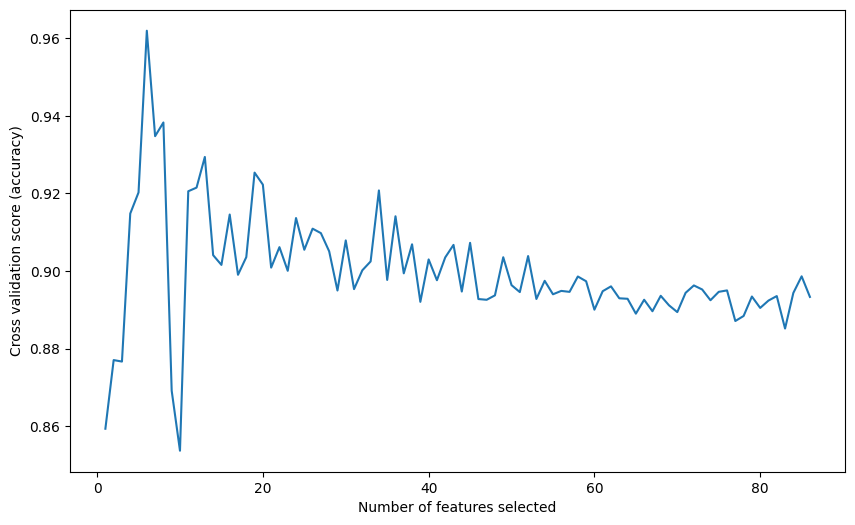

In [48]:
import matplotlib.pyplot as plt

# Plot number of features vs. cross-validation scores
plt.figure(figsize=(10, 6))
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (accuracy)")
plt.plot(range(1, len(rfecv.cv_results_['mean_test_score']) + 1), rfecv.cv_results_['mean_test_score'])
plt.show()

# IMPUTATION WITHOUT ONE-HOT ENCODING

In [78]:
import pandas as pd

# Assuming df_one_hot is your DataFrame
# df_one_hot = pd.read_csv('your_file.csv')

# Get count of null values in each column
null_count = df.isnull().sum()

# Display the count of null values
for index,value in enumerate(null_count):
  if (value!=0):
    print(list(df.columns)[index])


rx_kbps
tot_kbps


In [79]:
import pandas as pd
from sklearn.impute import KNNImputer
from sklearn.impute import SimpleImputer

# Assuming df is your DataFrame
# df_one_hot = pd.read_csv('your_file.csv')

# Selecting columns with missing values
columns_with_missing = ['rx_kbps', 'tot_kbps']
df_missing = df[columns_with_missing]

# Hot-Deck (HD) Imputation
# Filling missing values with the next available observation
df_hd = df_missing.fillna(method='bfill')

# Expectation Maximization (EM) Imputation
# Using SimpleImputer with EM method
em_imputer = SimpleImputer(strategy='constant', fill_value=None)  # EM is the default strategy
df_em = pd.DataFrame(em_imputer.fit_transform(df_missing), columns=df_missing.columns)

# K-Nearest Neighbor (KNN) Imputation
knn_imputer = KNNImputer(n_neighbors=5)  # Using 5 nearest neighbors
df_knn = pd.DataFrame(knn_imputer.fit_transform(df_missing), columns=df_missing.columns)

# Comparing the imputed values
print("Hot-Deck Imputation:")
print(df_hd.head())
print("\nExpectation Maximization (EM) Imputation:")
print(df_em.head())
print("\nK-Nearest Neighbor (KNN) Imputation:")
print(df_knn.head())

Hot-Deck Imputation:
   rx_kbps  tot_kbps
0      0.0       0.0
1      0.0       0.0
2      0.0       0.0
3      0.0       0.0
4      0.0       0.0

Expectation Maximization (EM) Imputation:
   rx_kbps  tot_kbps
0      0.0       0.0
1      0.0       0.0
2      0.0       0.0
3      0.0       0.0
4      0.0       0.0

K-Nearest Neighbor (KNN) Imputation:
   rx_kbps  tot_kbps
0      0.0       0.0
1      0.0       0.0
2      0.0       0.0
3      0.0       0.0
4      0.0       0.0


In [80]:
# Replace missing values in df with imputed values
df_with_hd = df.copy()
df_with_em = df.copy()
df_with_knn = df.copy()

df_with_hd[columns_with_missing] = df_hd
df_with_em[columns_with_missing] = df_em
df_with_knn[columns_with_missing] = df_knn

In [81]:
from sklearn.model_selection import train_test_split

# Define features (X) and target (y)
X_hd = df_with_hd.drop('label', axis=1)
y_hd = df_with_hd['label']

X_em = df_with_em.drop('label', axis=1)
y_em = df_with_em['label']

X_knn = df_with_knn.drop('label', axis=1)
y_knn = df_with_knn['label']

# Split the data
X_train_hd, X_test_hd, y_train_hd, y_test_hd = train_test_split(X_hd, y_hd, test_size=0.2, random_state=42)
X_train_em, X_test_em, y_train_em, y_test_em = train_test_split(X_em, y_em, test_size=0.2, random_state=42)
X_train_knn, X_test_knn, y_train_knn, y_test_knn = train_test_split(X_knn, y_knn, test_size=0.2, random_state=42)


In [82]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Initialize RandomForestClassifier
clf = RandomForestClassifier(random_state=42)

# Train the model with Hot-Deck imputed data
clf.fit(X_train_hd, y_train_hd)
y_pred_hd = clf.predict(X_test_hd)
accuracy_hd = accuracy_score(y_test_hd, y_pred_hd)

# Train the model with Expectation Maximization (EM) imputed data
clf.fit(X_train_em, y_train_em)
y_pred_em = clf.predict(X_test_em)
accuracy_em = accuracy_score(y_test_em, y_pred_em)

# Train the model with K-Nearest Neighbor (KNN) imputed data
clf.fit(X_train_knn, y_train_knn)
y_pred_knn = clf.predict(X_test_knn)
accuracy_knn = accuracy_score(y_test_knn, y_pred_knn)

print(f"Accuracy with Hot-Deck imputation: {accuracy_hd:.4f}")
print(f"Accuracy with Expectation Maximization (EM) imputation: {accuracy_em:.4f}")
print(f"Accuracy with K-Nearest Neighbor (KNN) imputation: {accuracy_knn:.4f}")

Accuracy with Hot-Deck imputation: 1.0000
Accuracy with Expectation Maximization (EM) imputation: 1.0000
Accuracy with K-Nearest Neighbor (KNN) imputation: 1.0000


In [83]:
# Compare the accuracies
if accuracy_hd > accuracy_em and accuracy_hd > accuracy_knn:
    print("Hot-Deck imputation performs the best.")
elif accuracy_em > accuracy_hd and accuracy_em > accuracy_knn:
    print("Expectation Maximization (EM) imputation performs the best.")
else:
    print("K-Nearest Neighbor (KNN) imputation performs the best.")


K-Nearest Neighbor (KNN) imputation performs the best.


# FEATURE SELECTION WITHOUT ONE-HOT ENCODING

In [84]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFECV
from sklearn.model_selection import train_test_split


# Splitting the data into features (X) and target (y)
X = df_with_knn.drop('label', axis=1)  # Features
y = df_with_knn['label']  # Target

# Initialize Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Initialize RFECV
rfecv = RFECV(estimator=rf_classifier, step=1, cv=5, scoring='accuracy', n_jobs=-1)

# Fit RFECV
rfecv.fit(X, y)

RFECV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
      scoring='accuracy')

In [85]:
# Print the optimal number of features
print(f"Optimal number of features: {rfecv.n_features_}")

# Get the selected features
selected_features = X.columns[rfecv.support_].tolist()
print("Selected features:")
print(selected_features)


Optimal number of features: 6
Selected features:
['pktcount', 'bytecount', 'packetins', 'pktperflow', 'byteperflow', 'pktrate']


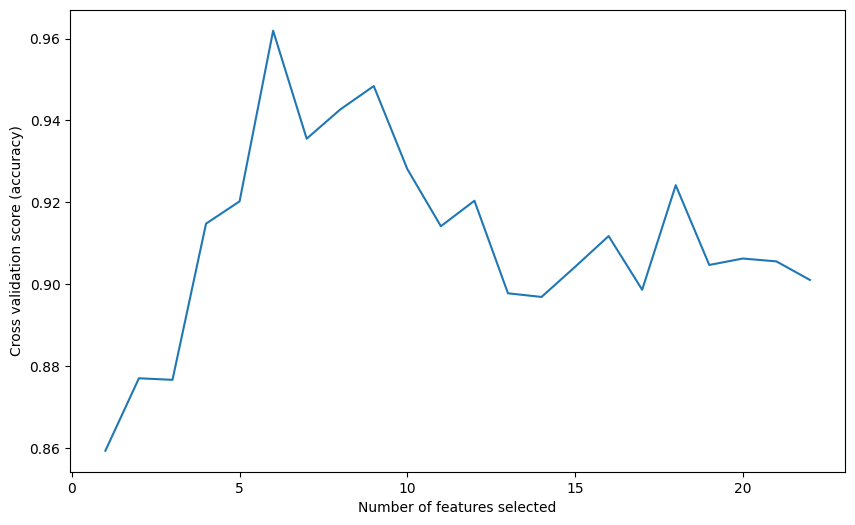

In [86]:
import matplotlib.pyplot as plt

# Plot number of features vs. cross-validation scores
plt.figure(figsize=(10, 6))
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (accuracy)")
plt.plot(range(1, len(rfecv.cv_results_['mean_test_score']) + 1), rfecv.cv_results_['mean_test_score'])
plt.show()

# CREATING FINAL DATAFRAME
Same features with and without one-hot encoding, and they don't include the categorical variables which were encoded.

In [92]:
all_features= selected_features+['label']
final_df=df[all_features]

# SPLITTING THE DATA

In [95]:
from sklearn.model_selection import train_test_split

In [97]:
shuffled_df = final_df.sample(frac=1, random_state=42)  # Replace 42 with any random seed for reproducibility
X_train, X_test, y_train, y_test = train_test_split(shuffled_df.drop('label', axis=1),  # Features (all but target)
                                                    shuffled_df['label'],
                                                    test_size=0.2,  # Adjust test size (common: 20-30%)
                                                    stratify=shuffled_df['label'],  # Stratify by target variable
                                                    random_state=42)


In [98]:
from collections import Counter

print("Training set class distribution:", Counter(y_train))
print("Testing set class distribution:", Counter(y_test))

Training set class distribution: Counter({0: 50849, 1: 32627})
Testing set class distribution: Counter({0: 12712, 1: 8157})


# MODEL TRAINING

## Logistic Regression

In [107]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, f1_score, roc_auc_score

# Define a pipeline to standardize the data and apply logistic regression
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Standardize the features
    ('logistic_regression', LogisticRegression(random_state=42))  # Logistic regression model
])

# Define the parameters grid to search over
param_grid = {
    'logistic_regression__C': [0.001, 0.01, 0.1, 1, 10, 100],  # Regularization strength
    'logistic_regression__penalty': ['l1', 'l2'],  # Regularization penalty
    'logistic_regression__solver': ['liblinear', 'saga']  # Solver for optimization
}

# Define scoring metrics
scoring = {
    'F1 Score': make_scorer(f1_score),
    'ROC AUC': make_scorer(roc_auc_score)
}

# Initialize GridSearchCV
grid_search = GridSearchCV(
    pipeline,  # Pipeline object
    param_grid=param_grid,  # Parameters grid
    scoring=scoring,  # Scoring metrics
    refit='F1 Score',  # Metric to refit on, i.e., F1 Score
    cv=5,  # 5-fold cross-validation
    verbose=1,  # Verbosity level
    n_jobs=-1  # Use all available CPU cores
)

# Train the model using GridSearchCV
grid_search.fit(X_train, y_train)

# Get the best parameters and best scores
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print(f"Best Parameters: {best_params}")
print(f"Best F1 Score: {best_score}")


Fitting 5 folds for each of 24 candidates, totalling 120 fits
Best Parameters: {'logistic_regression__C': 100, 'logistic_regression__penalty': 'l2', 'logistic_regression__solver': 'liblinear'}
Best F1 Score: 0.62447692648817


## Decision Trees

In [108]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, f1_score, roc_auc_score

# Define a Decision Tree classifier
decision_tree = DecisionTreeClassifier(random_state=42)

# Define the parameters grid to search over
param_grid = {
    'criterion': ['gini', 'entropy'],  # Splitting criterion
    'max_depth': [None, 10, 20, 30, 40, 50],  # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4]  # Minimum number of samples required to be at a leaf node
}

# Define scoring metrics
scoring = {
    'F1 Score': make_scorer(f1_score),
    'ROC AUC': make_scorer(roc_auc_score)
}

# Initialize GridSearchCV
grid_search = GridSearchCV(
    decision_tree,  # Decision Tree classifier
    param_grid=param_grid,  # Parameters grid
    scoring=scoring,  # Scoring metrics
    refit='F1 Score',  # Metric to refit on, i.e., F1 Score
    cv=5,  # 5-fold cross-validation
    verbose=1,  # Verbosity level
    n_jobs=-1  # Use all available CPU cores
)

# Train the model using GridSearchCV
grid_search.fit(X_train, y_train)

# Get the best parameters and best scores
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print(f"Best Parameters: {best_params}")
print(f"Best F1 Score: {best_score}")


Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best Parameters: {'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best F1 Score: 0.9999693439607602


## Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier


# Define a Random Forest classifier
random_forest = RandomForestClassifier(random_state=42)

# Define the parameters grid to search over
param_grid = {
    'n_estimators': [50, 100, 150],  # Number of trees in the forest
    'criterion': ['gini', 'entropy'],  # Splitting criterion
    'max_depth': [None, 10, 20, 30],  # Maximum depth of the trees
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4]  # Minimum number of samples required to be at a leaf node
}

# Define scoring metrics
scoring = {
    'F1 Score': make_scorer(f1_score),
    'ROC AUC': make_scorer(roc_auc_score)
}

# Initialize GridSearchCV
grid_search = GridSearchCV(
    random_forest,  # Random Forest classifier
    param_grid=param_grid,  # Parameters grid
    scoring=scoring,  # Scoring metrics
    refit='F1 Score',  # Metric to refit on, i.e., F1 Score
    cv=5,  # 5-fold cross-validation
    verbose=1,  # Verbosity level
    n_jobs=-1  # Use all available CPU cores
)

# Train the model using GridSearchCV
grid_search.fit(X_train, y_train)

# Get the best parameters and best scores
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print(f"Best Parameters: {best_params}")
print(f"Best F1 Score: {best_score}")


Fitting 5 folds for each of 216 candidates, totalling 1080 fits


## SVM

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, f1_score, roc_auc_score

# Define an SVM classifier
svm_classifier = SVC(random_state=42, probability=True)  # Setting probability to True for ROC AUC calculation

# Define the parameters grid to search over
param_grid = {
    'C': [0.1, 1, 10],  # Regularization parameter
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],  # Kernel type
    'gamma': ['scale', 'auto'],  # Kernel coefficient
    'degree': [2, 3, 4],  # Degree of the polynomial kernel
    'class_weight': [None, 'balanced']  # Weights associated with classes
}

# Define scoring metrics
scoring = {
    'F1 Score': make_scorer(f1_score),
    'ROC AUC': make_scorer(roc_auc_score)
}

# Initialize GridSearchCV
grid_search = GridSearchCV(
    svm_classifier,  # SVM classifier
    param_grid=param_grid,  # Parameters grid
    scoring=scoring,  # Scoring metrics
    refit='F1 Score',  # Metric to refit on, i.e., F1 Score
    cv=5,  # 5-fold cross-validation
    verbose=1,  # Verbosity level
    n_jobs=-1  # Use all available CPU cores
)

# Train the model using GridSearchCV
grid_search.fit(X_train, y_train)

# Get the best parameters and best scores
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print(f"Best Parameters: {best_params}")
print(f"Best F1 Score: {best_score}")


## Gradient Boosting

In [ ]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, f1_score, roc_auc_score

# Define an XGBoost classifier
xgb_classifier = xgb.XGBClassifier(random_state=42)

# Define the parameters grid to search over
param_grid = {
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 4, 5],
    'min_child_weight': [1, 3, 5],
    'gamma': [0, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'reg_alpha': [0, 0.1, 0.5],
    'reg_lambda': [1, 1.5, 2],
    'scale_pos_weight': [1, 3, 5]
}

# Define scoring metrics
scoring = {
    'F1 Score': make_scorer(f1_score),
    'ROC AUC': make_scorer(roc_auc_score)
}

# Initialize GridSearchCV
grid_search = GridSearchCV(
    xgb_classifier,  # XGBoost classifier
    param_grid=param_grid,  # Parameters grid
    scoring=scoring,  # Scoring metrics
    refit='F1 Score',  # Metric to refit on, i.e., F1 Score
    cv=5,  # 5-fold cross-validation
    verbose=1,  # Verbosity level
    n_jobs=-1  # Use all available CPU cores
)

# Train the model using GridSearchCV
grid_search.fit(X_train, y_train)

# Get the best parameters and best scores
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print(f"Best Parameters: {best_params}")
print(f"Best F1 Score: {best_score}")


## Neural Networks

In [ ]:
!pip install torch torchvision

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, f1_score, roc_auc_score

# Define a simple feedforward neural network using PyTorch
class NeuralNetwork(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(NeuralNetwork, self).__init__()
        self.fc1 = nn.Linear(input_dim, hidden_dim)
        self.fc2 = nn.Linear(hidden_dim, output_dim)
        self.relu = nn.ReLU()
        self.softmax = nn.Softmax(dim=1)

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        x = self.softmax(x)
        return x

# Initialize the neural network
input_dim = X_train.shape[1]
output_dim = 2  # Binary classification
neural_network = NeuralNetwork(input_dim, 128, output_dim)

# Convert data to PyTorch tensors
X_train_tensor = torch.tensor(X_train.values, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.long)

# Define the loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(neural_network.parameters(), lr=0.001)

# Define the parameters grid to search over
param_grid = {
    'hidden_dim': [64, 128, 256],  # Number of units in the hidden layer
    'optimizer': [optim.Adam, optim.SGD],  # Optimizer
    'lr': [0.001, 0.01, 0.1]  # Learning rate
}

# Define scoring metrics
scoring = {
    'F1 Score': make_scorer(f1_score),
    'ROC AUC': make_scorer(roc_auc_score)
}

# Define a custom PyTorch classifier for GridSearchCV
class PyTorchClassifier(nn.Module):
    def __init__(self, neural_network):
        super(PyTorchClassifier, self).__init__()
        self.neural_network = neural_network

    def forward(self, x):
        return self.neural_network(x)

# Initialize GridSearchCV
pytorch_classifier = PyTorchClassifier(neural_network)
grid_search = GridSearchCV(
    pytorch_classifier,  # PyTorch classifier
    param_grid=param_grid,  # Parameters grid
    scoring=scoring,  # Scoring metrics
    refit='F1 Score',  # Metric to refit on, i.e., F1 Score
    cv=5,  # 5-fold cross-validation
    verbose=1,  # Verbosity level
    n_jobs=-1  # Use all available CPU cores
)

# Train the model using GridSearchCV
grid_search.fit(X_train_tensor, y_train_tensor)

# Get the best parameters and best scores
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print(f"Best Parameters: {best_params}")
print(f"Best F1 Score: {best_score}")
